In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
df_healthy = pd.read_csv('data/result_healthy_pandas.csv', engine='python', header=None)
df_healthy.head()

,0,1,2,3
0,0,100,0.014603,0.192922
1,1,100,0.054449,0.164364
2,2,100,0.107646,0.090811
3,3,100,0.133722,0.086496
4,4,100,0.112652,0.099235


In [2]:
df_healthy.loc[df_healthy[1] == 100]

,0,1,2,3
0,0,100,0.014603,0.192922
1,1,100,0.054449,0.164364
2,2,100,0.107646,0.090811
3,3,100,0.133722,0.086496
4,4,100,0.112652,0.099235
...,...,...,...,...
485638,485638,100,0.035673,0.125122
485639,485639,100,-0.004590,0.124916
485640,485640,100,-0.023574,0.109302
485641,485641,100,0.005215,0.052185


In [4]:
df_faulty = pd.read_csv('data/result_faulty_pandas.csv', engine='python', header=None)
df_faulty.head()

,0,1,2,3
0,0,108,0.222699,-0.097385
1,1,108,0.093238,-0.180800
2,2,108,-0.146516,-0.233602
3,3,108,0.177217,-0.102111
4,4,108,0.248526,-0.033284


In [6]:
def get_recording(df,file_id):
    return np.array(df.sort_values(by=0, ascending=True).loc[df[1] == file_id].drop(0,1).drop(1,1))


In [8]:
healthy_sample = get_recording(df_healthy,100)
faulty_sample = get_recording(df_faulty,125)

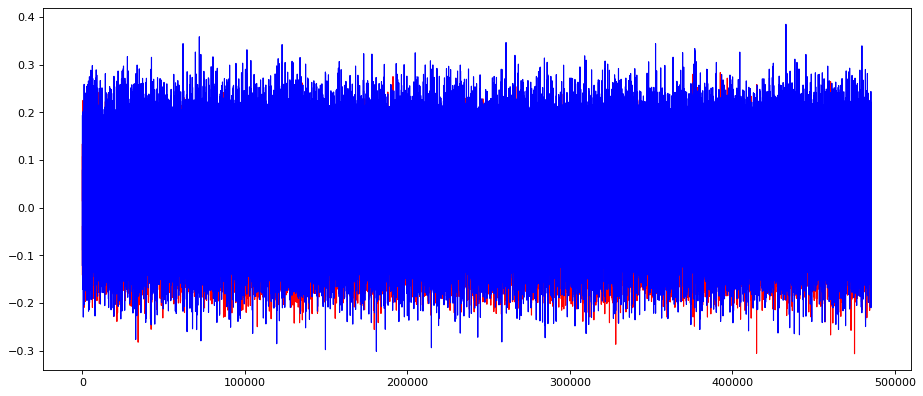

In [10]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(healthy_sample)
ax.plot(range(0,size), healthy_sample[:,0], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), healthy_sample[:,1], '-', color='blue', animated = True, linewidth=1)

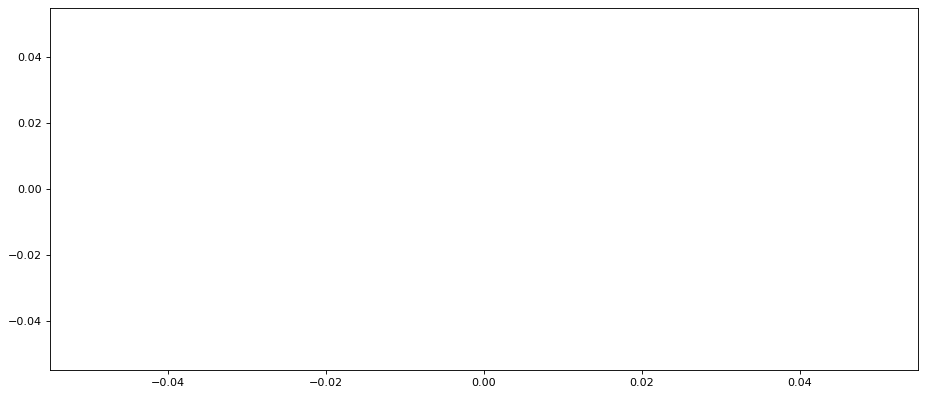

In [13]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(faulty_sample)
ax.plot(range(0,size), faulty_sample[:,1], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), faulty_sample[:,0], '-', color='blue', animated = True, linewidth=1)

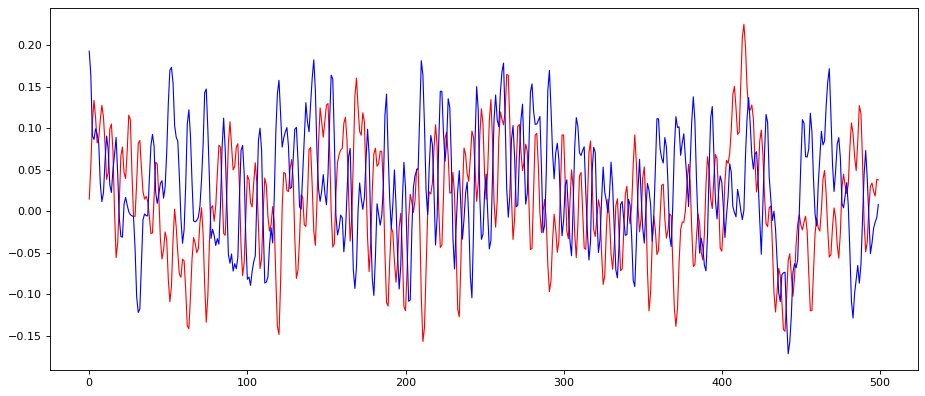

In [14]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
ax.plot(range(0,500), healthy_sample[:500,0], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,500), healthy_sample[:500,1], '-', color='blue', animated = True, linewidth=1)

In [19]:
#fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
#ax.plot(range(0,500), faulty_sample[:500,0], '-', color='red', animated = True, linewidth=1)
#ax.plot(range(0,500), faulty_sample[:500,1], '-', color='blue', animated = True, linewidth=1)

In [38]:
from keras.callbacks import Callback
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [39]:
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense

In [40]:
timesteps = 100
dim = 2
lossHistory = LossHistory()
# design network

model = Sequential()
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(Dense(2))
model.compile(loss='mae', optimizer='adam')

def train(data):
    model.fit(data, data, epochs=20, batch_size=72, validation_data=(data, data), verbose=1, shuffle=False,callbacks=[lossHistory])

def score(data):
    yhat =  model.predict(data)
    return yhat

In [41]:
def create_trimmed_recording(df,file_id):
    recording = get_recording(df,file_id) 
    samples = len(recording)
    trim = samples % 100
    recording_trimmed = recording[:samples-trim]
    recording_trimmed.shape = (int((samples-trim)/timesteps),timesteps,dim)
    return recording_trimmed


In [42]:
#pd.unique()
#df_healthy.drop(0,1).drop(2,1).drop(3,1)
pd.unique(df_healthy.iloc[:,1])

array([100,  98,  97])

In [52]:
file_ids = pd.unique(df_healthy.iloc[:,1])
start = time.time()
for file_id in file_ids:
    recording_trimmed = create_trimmed_recording(df_healthy,file_id)
    print("Staring training on %s" % (file_id))
    train(recording_trimmed)
    print("Finished training on %s after %s seconds" % (file_id,time.time()-start))

print("Finished job on after %s seconds" % (time.time()-start))
healthy_losses = lossHistory.losses


Staring training on 100
Train on 4856 samples, validate on 4856 samples
Epoch 1/20
4856/4856 [==============================] - 4s 862us/step - loss: 3.6182e-04 - val_loss: 2.5196e-04
Epoch 2/20
4856/4856 [==============================] - 4s 869us/step - loss: 3.6345e-04 - val_loss: 4.1288e-04
Epoch 3/20
4856/4856 [==============================] - 5s 985us/step - loss: 3.6718e-04 - val_loss: 3.9927e-04
Epoch 4/20
4856/4856 [==============================] - 5s 1ms/step - loss: 3.6032e-04 - val_loss: 3.8075e-04
Epoch 5/20
4856/4856 [==============================] - 5s 1ms/step - loss: 3.5133e-04 - val_loss: 3.7215e-04
Epoch 6/20
4856/4856 [==============================] - 5s 1ms/step - loss: 3.4393e-04 - val_loss: 3.5969e-04
Epoch 7/20
4856/4856 [==============================] - 5s 1ms/step - loss: 3.3647e-04 - val_loss: 3.6551e-04
Epoch 8/20
4856/4856 [==============================] - 5s 1ms/step - loss: 3.3133e-04 - val_loss: 3.6618e-04
Epoch 9/20
4856/4856 [====================

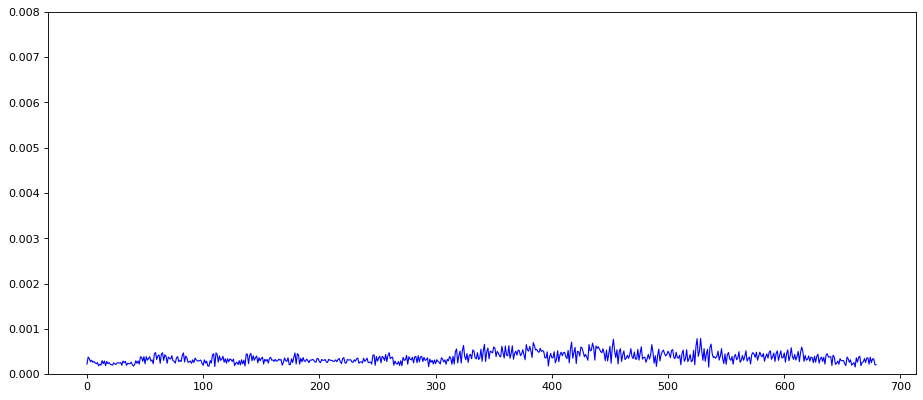

In [53]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(healthy_losses)
plt.ylim(0,0.008)
ax.plot(range(0,size), healthy_losses, '-', color='blue', animated = True, linewidth=1)

In [ ]:
#file_ids = spark.sql('select distinct _c1 from df_healhty').rdd.map(lambda row : row._c1).collect()
start = time.time()
for file_id in [105]:
    recording_trimmed = create_trimmed_recording(df_faulty,file_id)
    print("Staring training on %s" % (file_id))
    train(recording_trimmed)
    print("Finished training on %s after %s seconds" % (file_id,time.time()-start))

print("Finished job on after %s seconds" % (time.time()-start))
healthy_losses = lossHistory.losses

In [56]:
file_ids = pd.unique(df_faulty.iloc[:,1])
start = time.time()
for file_id in file_ids:
    recording_trimmed = create_trimmed_recording(df_faulty,file_id)
    print("Staring training on %s" % (file_id))
    train(recording_trimmed)
    print("Finished training on %s after %s seconds" % (file_id,time.time()-start))

print("Finished job on after %s seconds" % (time.time()-start))
healthy_losses = lossHistory.losses

483903
4839
100
2
Staring training on 98
Train on 4839 samples, validate on 4839 samples
Epoch 1/20
4839/4839 [==============================] - 13s 3ms/step - loss: 4.6685e-04 - val_loss: 4.7908e-04
Epoch 2/20
4839/4839 [==============================] - 13s 3ms/step - loss: 4.5497e-04 - val_loss: 3.5161e-04
Epoch 3/20
4839/4839 [==============================] - 13s 3ms/step - loss: 2.8586e-04 - val_loss: 2.1897e-04
Epoch 4/20
4839/4839 [==============================] - 13s 3ms/step - loss: 3.3602e-04 - val_loss: 3.4138e-04
Epoch 5/20
4839/4839 [==============================] - 13s 3ms/step - loss: 3.3868e-04 - val_loss: 3.4226e-04
Epoch 6/20
4839/4839 [==============================] - 13s 3ms/step - loss: 3.3224e-04 - val_loss: 3.3069e-04
Epoch 7/20
4839/4839 [==============================] - 13s 3ms/step - loss: 3.2632e-04 - val_loss: 3.2423e-04
Epoch 8/20
4839/4839 [==============================] - 13s 3ms/step - loss: 3.2103e-04 - val_loss: 3.1341e-04
Epoch 9/20
4839/4839 [=

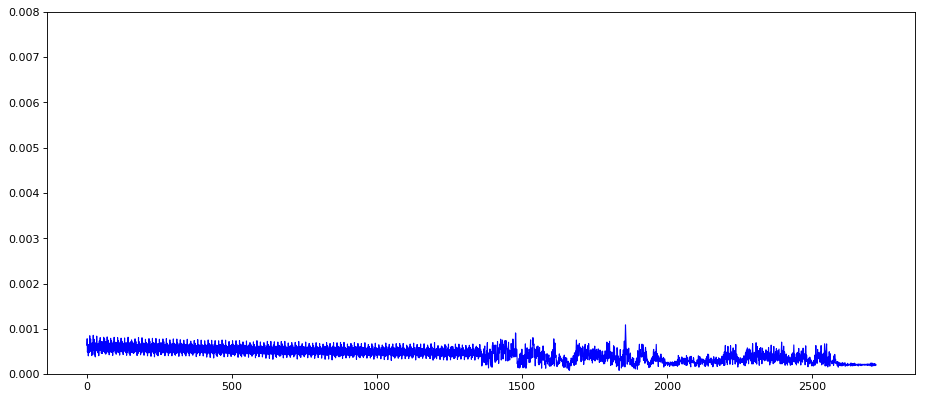

In [57]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(healthy_losses+faulty_losses)
plt.ylim(0,0.008)
ax.plot(range(0,size), healthy_losses+faulty_losses, '-', color='blue', animated = True, linewidth=1)